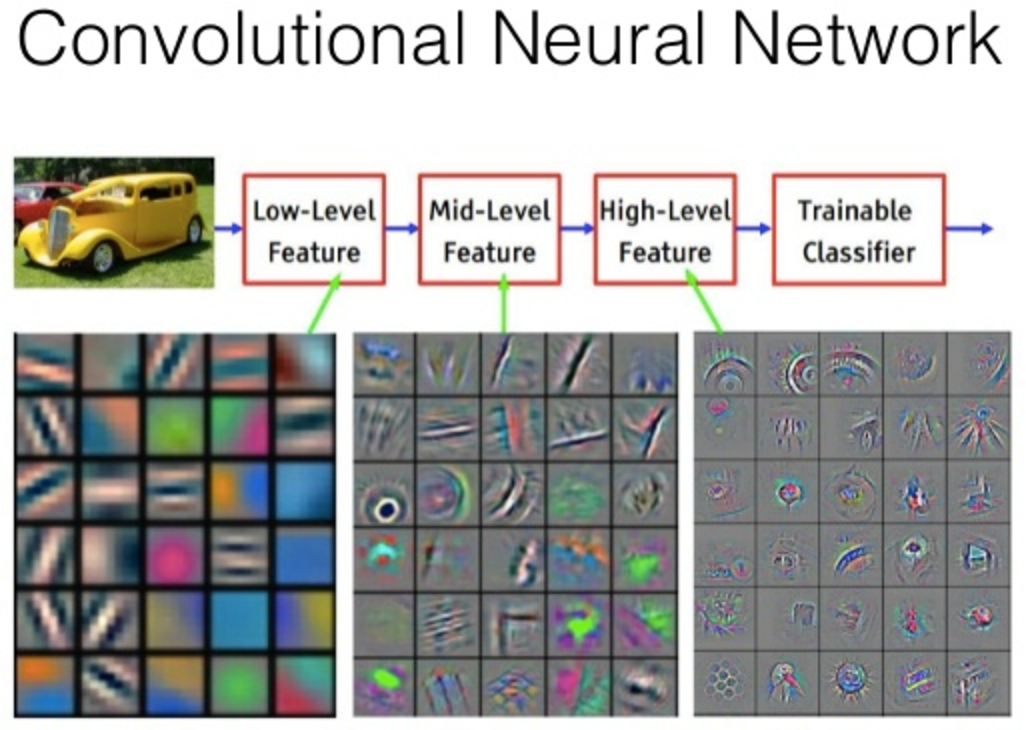

###Deep Learning Project – Cats and Dogs Classification

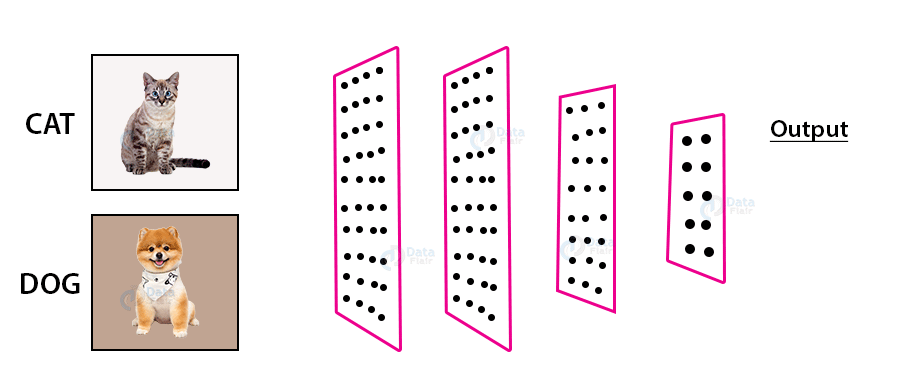

###IMPORT THE IMPORTANT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import random
import os

####Define image properties:

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3
batch_size = 16
image_shape = (Image_Width,Image_Height,Image_Channels)
Image_Path = '/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train'
train_Image_Path = '/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train'
test_image_path ='/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/test'
train_path = train_Image_Path
test_path = test_image_path

####Prepare dataset for training model

In [ ]:
filenames=os.listdir(Image_Path)
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [ ]:
df.head()

,filename,category
0,dogs,0
1,cats,0


####Create the neural net model

##import the necessary files from keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

###We first initialize the CNN Model

In [ ]:
Cnn_model=Sequential()

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [ ]:
Cnn_model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
Cnn_model.add(BatchNormalization())
Cnn_model.add(MaxPooling2D(pool_size=(2,2)))
Cnn_model.add(Dropout(0.4))

In [ ]:
Cnn_model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(MaxPooling2D(pool_size=(2,2)))
Cnn_model.add(Dropout(0.4))

In [ ]:
Cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(MaxPooling2D(pool_size=(2,2)))
Cnn_model.add(Dropout(0.4))

Adaptive Moment Estimation (Adam) is a method used for computing individual learning rates for each parameter. For loss function, we are using Binary cross-entropy to compare the class output to each of the predicted probabilities. Then it calculates the penalization score based on the total distance from the expected value.

In [ ]:
Cnn_model.add(Flatten())
Cnn_model.add(Dense(128))
Cnn_model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
Cnn_model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
Cnn_model.add(Dense(1))
Cnn_model.add(Activation('sigmoid'))

Cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

####Fitting the Model

Define callbacks and learning rate.

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

##Analyzing model

In [ ]:
Cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 batch_normalization_5 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 58, 58, 64)        51264     
                                                                 
 batch_normalization_6 (Batc  (None, 58, 58, 64)      

###Manage data

In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
train_df

## Create dynamic cat image path

In [ ]:
cat_images_path = df['filename'].iloc[1]
final_cat_image_path = Image_Path +'/' + cat_images_path +'/' + '19.jpg'

##Create dynamic dog image path

In [ ]:
dog_images_path = df['filename'].iloc[0]
final_dog_image_path = Image_Path +'/' + dog_images_path +'/' + '19.jpg'

In [ ]:
final_cat_image_path 

'/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train/cats/19.jpg'

In [ ]:
final_dog_image_path

'/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train/dogs/19.jpg'

##Randomly selected one cat image path

In [ ]:
import cv2 #import Computer vision Library
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [ ]:
cat_image_read = cv2.imread(final_cat_image_path)
cat_image_read = cv2.cvtColor(cat_image_read,cv2.COLOR_BGR2RGB)

In [ ]:
dog_image_read = cv2.imread(final_dog_image_path)
dog_image_read = cv2.cvtColor(dog_image_read,cv2.COLOR_BGR2RGB)

In [ ]:
type(cat_image_read)

numpy.ndarray

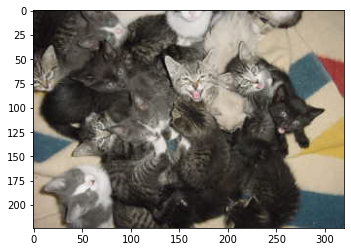

In [ ]:
plt.imshow(cat_image_read)

In [ ]:
type(dog_image_read)

numpy.ndarray

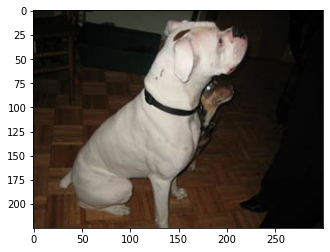

In [ ]:
plt.imshow(dog_image_read)

###Training and validation data generator

###Image Manipulation
Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

### Image Data generators

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [ ]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator,load_img
image_datagen = ImageDataGenerator(rotation_range=30,# rotate the image 30 degrees
                                   rescale=1./255, # Rescale the image by normalzing it.
                                   shear_range=0.1,# Shear means cutting away part of the image (max 10%)
                                   zoom_range=0.2, # Zoom in by 20% max
                                   horizontal_flip=True,# Allow horizontal flipping
                                   width_shift_range=0.1,# Shift the pic width by a max of 10%
                                   height_shift_range=0.1, # Shift the pic height by a max of 10%
                                   fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                                )

In [ ]:
Image_Path

'/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train'

### To check how your dog image are randomly work with that train data generators

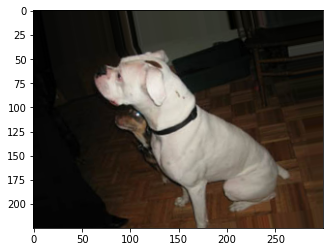

In [ ]:
plt.imshow(image_datagen.random_transform(dog_image_read))

###To check how your cat image are randomly work with that train data generators

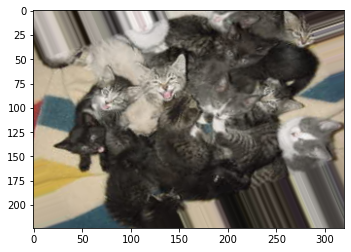

In [ ]:
plt.imshow(image_datagen.random_transform(cat_image_read))

### Train Data image path checking from Flow from Directory

In [ ]:
train_data_Image_Path = '/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/train'
image_datagen.flow_from_directory(train_data_Image_Path)

Found 40 images belonging to 2 classes.


###Test Data image path checking from Flow from Directory

In [ ]:
test_data_Image_Path = '/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/test'
image_datagen.flow_from_directory(test_data_Image_Path)

Found 20 images belonging to 2 classes.


###Training the Model

In [ ]:
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,Image_Size)
        x_train.append(img_arr)

In [ ]:
train_x=np.array(x_train)

In [ ]:
train_x

array([[[[ 66, 110,  84],
         [ 49,  90,  60],
         [ 45, 109,  77],
         ...,
         [ 45, 108,  78],
         [ 45, 120,  82],
         [ 58, 118,  82]],

        [[ 57, 101,  86],
         [ 45,  82,  63],
         [ 62, 117,  92],
         ...,
         [ 87, 129, 106],
         [ 32,  82,  50],
         [ 55,  96,  66]],

        [[ 83, 132, 113],
         [ 66, 103,  87],
         [ 73, 124, 104],
         ...,
         [ 54,  81,  66],
         [ 64,  97,  76],
         [ 68, 100,  77]],

        ...,

        [[182, 153, 148],
         [165, 137, 132],
         [169, 140, 135],
         ...,
         [244, 242, 248],
         [245, 244, 253],
         [244, 243, 252]],

        [[181, 152, 148],
         [174, 144, 141],
         [159, 131, 127],
         ...,
         [246, 243, 252],
         [246, 246, 251],
         [245, 246, 251]],

        [[175, 147, 141],
         [180, 152, 145],
         [175, 148, 140],
         ...,
         [247, 246, 250],
        

In [ ]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,Image_Size)
        x_test.append(img_arr)

In [ ]:
test_x=np.array(x_test)

In [ ]:
test_x

array([[[[ 69,  94, 120],
         [ 67,  92, 118],
         [ 65,  90, 116],
         ...,
         [ 53,  21,  20],
         [ 43,  16,  14],
         [ 35,  12,  10]],

        [[ 60,  85, 111],
         [ 56,  81, 107],
         [ 60,  85, 111],
         ...,
         [ 56,  24,  24],
         [ 44,  18,  16],
         [ 33,  11,   9]],

        [[ 60,  84, 112],
         [ 55,  79, 107],
         [ 62,  86, 114],
         ...,
         [ 46,  19,  18],
         [ 37,  14,  12],
         [ 31,  12,   9]],

        ...,

        [[ 74,  88, 100],
         [ 70,  84,  96],
         [ 75,  88,  97],
         ...,
         [ 52,  65,  67],
         [ 48,  61,  63],
         [ 49,  62,  64]],

        [[ 76,  88, 100],
         [ 71,  84,  96],
         [ 78,  93, 102],
         ...,
         [ 51,  63,  65],
         [ 46,  59,  61],
         [ 46,  59,  60]],

        [[ 81,  93, 105],
         [ 75,  89, 101],
         [ 85, 100, 109],
         ...,
         [ 57,  69,  71],
        

In [ ]:
train_image_gen = image_datagen.flow_from_directory(train_Image_Path,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 40 images belonging to 2 classes.


In [ ]:
test_image_gen = image_datagen.flow_from_directory(test_image_path,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
train_y=train_image_gen.classes
test_y=test_image_gen.classes

In [ ]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
train_y.shape

(40,)

In [ ]:
test_y.shape


(20,)

In [ ]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

###Fitting the Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
epochs=15
results = Cnn_model.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=3,
                              validation_data=test_image_gen,
                              validation_steps=12)

Epoch 1/15
3/3 [==============================] - 5s 2s/step - loss: 0.5015 - accuracy: 0.9250 - val_loss: 4.6956 - val_accuracy: 0.4500
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.2473 - accuracy: 0.9000
Epoch 3/15
3/3 [==============================] - 3s 935ms/step - loss: 0.2669 - accuracy: 0.8750
Epoch 4/15
3/3 [==============================] - 3s 956ms/step - loss: 0.4884 - accuracy: 0.8250
Epoch 5/15
3/3 [==============================] - 3s 922ms/step - loss: 0.2323 - accuracy: 0.9000
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.2607 - accuracy: 0.9000
Epoch 7/15
3/3 [==============================] - 3s 948ms/step - loss: 0.4029 - accuracy: 0.8500
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3503 - accuracy: 0.8750
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.1914 - accuracy: 0.9000
Epoch 10/15
3/3 [==============================] - 3s 961ms/step - loss: 0.2375 - accuracy:

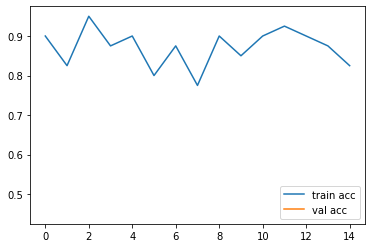

In [ ]:
#accuracies
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.savefig('/content/Model_Save'+'/accuracies.png')
plt.legend()
plt.show()

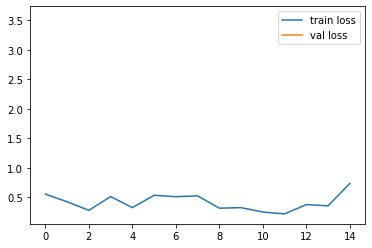

In [ ]:
# loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.savefig('/content/Model_Save'+'/loss.png')
plt.legend()
plt.show()

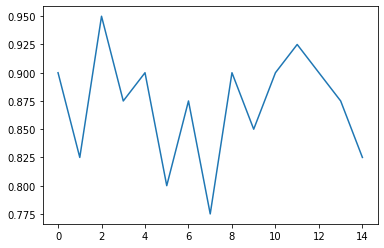

In [ ]:
plt.plot(results.history['accuracy'])

####Evaluating the Model

In [1]:
results.history['accuracy']

NameError: ignored

In [ ]:
Cnn_model.evaluate(test_x,test_y,batch_size=32)

1/1 [==============================] - 0s 349ms/step - loss: 251.4219 - accuracy: 0.4000


[251.42190551757812, 0.4000000059604645]

In [ ]:
#predict
y_pred=Cnn_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        20
           1       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.50      0.25      0.33        20
weighted avg       1.00      0.50      0.67        20



In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[10 10]
 [ 0  0]]


Save the model

In [ ]:
Model_Save_path ='/content/Model_Save'
Cnn_model.save(Model_Save_path + '/cat_dog2.h5')

In [ ]:
Cnn_model.save(Model_Save_path+'/'+'cat_dog_15epochs.h5')

####Test data preparation

In [ ]:
train_df

,filename,category
0,dogs,cat


In [ ]:
test_image_path

'/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/test'

In [ ]:
test_filenames = os.listdir(test_image_path)
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category':0
})
nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

,filename,category
0,dogs,0
1,cats,0


###Make categorical prediction

In [ ]:
test_image_path

'/content/drive/MyDrive/Colab Notebooks/Pet_dog_CNN/data/test'

In [ ]:
test_generator = image_datagen.flow_from_dataframe(test_df,
test_image_path+"/",x_col='filename',y_col=None,
target_size=Image_Size,
class_mode=None,
batch_size=batch_size
)

Found 0 validated image filenames.


In [ ]:
test_df.head(18)

,filename
0,dogs
1,cats


In [ ]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator,load_img

###Predicting on new images

In [ ]:
#to predict new images 
def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = Image_Size)   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)

In [ ]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
##import the necessary libs for image processing
import numpy as np
from keras.preprocessing import image

In [ ]:
dog_file = test_image_path+ '/dogs/110.jpg'
dog_img = image.load_img(dog_file, target_size=(128, 128))
dog_img = image.img_to_array(dog_img)


In [ ]:
dog_img.shape

(128, 128, 3)

In [ ]:
dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [ ]:
dog_img.shape

(1, 128, 128, 3)

In [ ]:
Cnn_model.predict(dog_img)

array([[0.9882313]], dtype=float32)

In [ ]:
print(f'Probability that image is a dog is: {Cnn_model.predict(dog_img)} ')

Probability that image is a dog is: [[0.9882313]] 


In [ ]:
cat_file = test_image_path+ '/cats/109.jpg'
cat_img = image.load_img(cat_file, target_size=Image_Size)
cat_img = image.img_to_array(cat_img)

In [ ]:
cat_img.shape

(128, 128, 3)

In [ ]:
cat_img = np.expand_dims(cat_img, axis=0)
cat_img = cat_img/255

In [ ]:
cat_img.shape

(1, 128, 128, 3)

In [ ]:
Cnn_model.predict(cat_img)

array([[0.98061913]], dtype=float32)

In [ ]:
print(f'Probability that image is a cat is: {Cnn_model.predict(cat_img)} ')

Probability that image is a cat is: [[0.98061913]] 
